In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#12.1 텐서플로 훑어보기

#12.2 넘파이처럼 텐서플로 사용하기

tf.constant() 함수로 텐서 만들기

##12.2.1 텐서와 연산

In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]])   #행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)     #스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
#데이터 타입과 크기도 있다..

t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

In [5]:
#인덱스 참조도 넘파이와 비슷..

t[:, 1:]    #행은 다 가져오고 열은 1열 부터..

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
#newaxis..??

t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

###텐서의 연산..

- 모든 종류의 텐서 연산 가능
- 넘파이와 비슷한 기능을 하는 메서드가 많지만, 이름을 정확히 해야함..

In [7]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
#t와 t의 전치의 행렬 곱(@)

t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

###케라스의 저수준 API

- keras.backend 사용..
- square(), exp(), sqrt()등의 함수가 포함됨..

In [10]:
from tensorflow import keras
K = keras.backend

#전치 후 제곱 후 10을 더히기
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

##12.2.2 텐서와 넘파이

- 넘파이랑 텐서플로 서로서로 연산 교차 가능..

In [11]:
#넘파이 배열에서 텐서로 바꾸기..

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [12]:
#다시 넘파이로..

t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [13]:
#넘파이 배열을 tf연산으로..

tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [14]:
#텐서를 넘파이 연산으로..

np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

##12.2.3 타입 변환

- 텐서플로는 자동 타입변환 하나도 없다..
- 다른걸 더하려면 예외 발생!

In [15]:
#실수형이라 정수형 더하니까 예외..

try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [16]:
#얘도..

try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [17]:
#타입변환은 tf.cast()함수를 사용!!

t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)      #타입변환해서 더하니까 됨..

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

##12.2.4 변수

- 앞선 tf.Tensor는 변경이 불가능했다..
- 근데 변수 tf.Variable로 하면 변경 가능하다!

In [18]:
v = tf.Variable([[1., 2., 3.],[4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

assign()메서드로 변숫값을 바꿀 수 있다!!

In [19]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [20]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [21]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [22]:
v.scatter_nd_update(indices=[[0,0], [1,2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [23]:
#일반적으로 할당하면 에러가 남..

try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


##12.2.5 다른 데이터 구조

###희소 텐서

- 대부분 0으로 채워진 텐서
- 제약이 좀 많네..
    - 정렬이 안 되어있으면 밀집행렬로 안 바뀜
    - 실수형 더하는건 안됨..
    - 희소행렬과 밀집행렬을 곱하려면 sparse.sparse_dense_matmul() 메서드 사용..

In [24]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [25]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [26]:
#밀집행렬로 바꾸기.. 깊복은 아님..

tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [27]:
s2 = s *2.0

In [28]:
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [29]:
#희소행렬에 실수형을 더하면 예외..

try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [30]:
#밀집행렬..
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])

#희소행렬과 밀집행렬 곱할 때 사용하는 메서드
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [31]:
#순서가 안맞으면 밀집행렬로 못바꿈..

s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],      #순서가 안맞음..
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [32]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [33]:
s6 = tf.sparse.reorder(s5)  #reorder해야 변환 가능..
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

###문자열

In [34]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [35]:
tf.constant("cafe")

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [36]:
#아스키 코드값으로 리스트를 만든다..
u = tf.constant([ord(c) for c in "cafe"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

In [37]:
#유니코드로 다시 인코딩..
b = tf.strings.unicode_encode(u, "UTF-8")
print(b)
tf.strings.length(b, unit="UTF8_CHAR")      #문자열의 길이..

tf.Tensor(b'cafe', shape=(), dtype=string)


<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [38]:
#다시 아스키코드(숫자)로.. decode..
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

###문자열 배열

In [39]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [40]:
#문자열 배열에 있는 원소의 길이를 반환,.
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [41]:
#유니코드에서 숫자로 디코드..
r = tf.strings.unicode_decode(p, "UTF-8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [42]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


###래그드 텐서

- 리스트의 리스트
- 동일한 데이터 타입을 가져야 하지만 리스트의 길이는 다를 수 있다..

In [43]:
#얘는 래그드 텐서가 아님..
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [44]:
#얘는 리스트의 리스트다..
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [45]:
#래그드 텐서 생성..
r2 = tf.ragged.constant([[65,66],[],[67]])
print(r.shape)
print(r2.shape)

#axis=0의 방향으로 연결시켰다..(얘는 무지성..)
r_2 = tf.concat([r, r2], axis=0)
print(r_2.shape)
print(r_2)

(4, None)
(3, None)
(7, None)
<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [46]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [67]])

print(r.shape)
print(r3.shape)

#얘는 row의 갯수가 같아야 axis=1로 조질수 있음
r_3 = tf.concat([r, r3], axis=1)
print(r_3.shape)
print(r_3)

(4, None)
(4, None)
(4, None)
<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 67]]>


###집합

- tf.sets 패키지의 연산 활용..
- 집합 연산 후 원소의 갯수가 많은 것 기준으로 shape이 결정되는 듯..

In [47]:
#set1 = [{2,3,5,7}, {7,9,0}]
set1 = tf.constant([[2,3,5,7],[7,9,0,0]])

#set2 = [{4,5,6}, {9,10,0}]
set2 = tf.constant([[4,5,6], [9,10,0]])

#인덱스가 맞는 거 끼리 합집합..
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [48]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [49]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

###텐서 배열

- 매개변수 dynamic_size로 크기를 동적, 정적으로 할지 선택 가능..
- clear_after_read : 읽고나서 지울거냐.. 기본값 True

In [50]:
#텐서 배열에 크기 3으로 지정해놓고,
array = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)

#array.write를 사용해서 몇 번재에 뭐를 적을지 결정..
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [51]:
array

In [52]:
array.read(2)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([5., 7.], dtype=float32)>

In [53]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [54]:
#tf.nn.moments : axes로 축을 지정하고 정규화하는 메서드..
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3.       , 6.3333335], dtype=float32)>

In [55]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 2.6666667, 10.888888 ], dtype=float32)>

#12.3 사용자 정의 모델과 훈련 알고리즘

##12.3.1 사용자 정의 손실 함수

손실함수를 어떤걸 해야할까?

- 평균 제곱 오차 : 너무 과한 벌칙 -> 정확하지 않은 모델..
- 평균 절댓값 오차 : 너무 관대함.. -> 수렴하기까지 오랜 시간이 걸림..
- 이럴 때 후버 손실 하용!
    - 일정 범위 안에 있으면 제곱 오차, 밖이면 오차의 절댓값

###후버 손실 코딩..

- tf.where(bool배열, 참일때 반환 값, 거짓일때 반환 값)

In [56]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    #오차가 1보다 작은 위치를 나타내는 bool 배열을 생성..
    is_small_error = tf.abs(error) < 1

    squared_loss = tf.square(error) / 2         #제곱 오차
    linear_loss = tf.abs(error) - 0.5           #절댓값 오차
    
    #1보다 오차가 작으면 제곱오차, 크면 절댓값 오차
    return tf.where(is_small_error, squared_loss, linear_loss)

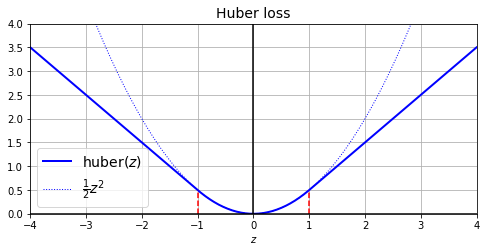

In [57]:
#후버손실 그래프..

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

###캘리포니아 주택 데이터셋 적용

In [58]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

#타겟은 2차원 리스트로 변형..
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
#검증세트도 분리..
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

#전처리..
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [59]:
#샘플갯수 제외한 모양..
input_shape = X_train.shape[1:]

#활성화 함수 selu를 이용해서 르쿤정규 초기화 수행
#자기정규화가 일어나므로 배치정규화 불필요..
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                        input_shape = input_shape),
    keras.layers.Dense(1),
])

In [60]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [61]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5613 - mae: 0.9166 - val_loss: 0.2204 - val_mae: 0.5058
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2048 - mae: 0.4970 - val_loss: 0.1935 - val_mae: 0.4732


##12.3.2 사용자 정의 요소를 가진 모델을 저장하고 로드하기

- 저장 시에는 상관없음..
- 로드할 때는 딕셔너리로 사용자 정의 요소가 무엇인지 이름과 객체를 매핑해서 알려줘야 함

In [62]:
#저장은 스무스..
model.save("my_model_with_a_custom_loss.h5")

In [63]:
#로드할 땐 매핑해서..
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [64]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1993 - mae: 0.4887 - val_loss: 0.1843 - val_mae: 0.4658
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1946 - mae: 0.4815 - val_loss: 0.1936 - val_mae: 0.4751


앞선 후버 함수는 오차범위가 -1 ~ 1 이었다..

이를 바꾸려면?? -> 매개변수를 받을 수 있는 함수를 구현..

In [65]:
#임계값을 지정할 수 있음..
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold

        #임계값일때는 (오차의 제곱)/2로 동일하다..
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [66]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [67]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2168 - mae: 0.4829 - val_loss: 0.2244 - val_mae: 0.4789
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2124 - mae: 0.4776 - val_loss: 0.2324 - val_mae: 0.4840


In [68]:
#얘를 저장..

model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [69]:
#로드해올 때는 아까와 같이 딕셔너리로 이름과 객체 매핑..
#이름은 저장한 케라스 모델에서 사용했던 함수 이름 "huber_fn"을 사용..

model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [70]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2118 - mae: 0.4749 - val_loss: 0.1959 - val_mae: 0.4621
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2085 - mae: 0.4724 - val_loss: 0.2101 - val_mae: 0.4701


keras.losses.Loss 클래스를 상속하고 get_config()메서드를 구현해서 해결할 수도 있음..

In [71]:
#코드 이해 필요..
class HuberLoss(keras.losses.Loss):
    #부모 클래스를 상속받는 과정..
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold  #임계값만 지정
        super().__init__(**kwargs)

    #실제 손실을 구하는 call메서드
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    #손실함수를 불러오는 메서드
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [73]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [74]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7858 - mae: 0.9461 - val_loss: 0.3932 - val_mae: 0.5802
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2475 - mae: 0.5153 - val_loss: 0.2778 - val_mae: 0.5160


In [75]:
#저장 및 복원..

model.save("my_model_with_a_custom_loss_class.h5")

In [76]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [77]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2336 - mae: 0.5025 - val_loss: 0.2259 - val_mae: 0.4830
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2246 - mae: 0.4950 - val_loss: 0.2405 - val_mae: 0.4890


In [78]:
#임계값 확인..

model.loss.threshold

2.0

##12.3.3 활성화 함수, 초기화, 규제, 제한을 커스터마이징하기

- 얘도 똑같다.. 저장할 땐 맘대론데 로드할 땐 딕셔너리로 매핑해서 해줘야한다..

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
def my_softplus(z): # tf.nn.softplus(z)와 동일.. log(1+x)
    return tf.math.log(tf.exp(z) + 1.0)

#글로럿 초기화 구현
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

#l1 규제 구현
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

#제한 구현..(가중치가 음수이면 0으로.. relu와 동일..)
def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [81]:
#사용자 정의한 걸로 층을 만듦..
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [82]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [83]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [84]:
#저장할땐 맘대로..
model.save("my_model_with_many_custom_parts.h5")

In [85]:
#로드할땐 매핑해서~
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

##12.3.4 사용자 정의 지표

**손실**
- 미분가능해야하고 그레이디언트가 모든 곳에서 0이 아니어야함
- 쉽게 이해못해도 괜찮다..

**지표**
- 모델을 평가할 때 사용
- 이해하기 쉬워야 한다
- 미분 불가해도 되고 그레이디언트가 0이어도 괜찮다..

###스트리밍 지표

- 훈련하는 동안 케라스는 지표를 계산하고 에포크가 시작할 때부터 평균을 기록한다.
- 보통은 맞지만 항상 맞는건 아니다!
- ex)재현율,.
    - TP와 FP를 기록하고 필요 시 계산할 수 있는 객체가 필요!!
- 배치에 따라 점진적으로 업데이트된다..

In [86]:
#precision([레이블], [예측]) : 주어진 레이블과 예측에 대한 정밀도를 계산..
#아래 예시는 5개의 양성 예측 중에서 진짜 양성은 4개니까 0.8..

precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [87]:
#얘가 재현율이 0(0/3) 이어야하는데 앞선 precision과 연결해서 해서
#(4+0 / 5+3) = 0.5로 나왔다..

precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [88]:
#현재 지표값
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [89]:
#TP와 FP를 기록한 변수 확인..
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [90]:
#초기화..
precision.reset_states()

스트리밍 지표 만들기

- 아래의 예는 후버 손실의 평균을 나타내는 함수를 구현..
- 아래의 클래스를 정의하는 유일한 이점은 threshold도 저장할 수 있다는 것이다!!

In [91]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)      #부모 클래스의 생성자를 호출하며 기본 매개변수 처리
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)     #임계값을 지정해서 후버손실함수 설정..

        #변수를 만드는 add_weight()메서드.. 이름과 초기화 설정이 됨..
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    #샘플별 가중치는 없고 레이블과 예측이 들어왔을때 손실함수의 상태를 업데이트하는 메서드        
    def update_state(self, y_true, y_pred, sample_weight=None):
        #손실함수 텐서베열 생성..
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))    #손실함수 텐서배열을 더해서 재할당..
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))     #들어온 샘플 갯수를 타입변환후 더해서 재할당..
    
    #실제 무엇을 반환하는가..
    def result(self):
        #손실함수의 평균..
        return self.total / self.count
    
    #threshold 변수를 모델과 함께 저장..
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

잘 작동하는지 확인..

In [92]:
#스트리밍 지표 객체 생성..

m = HuberMetric(2.)

In [93]:
# y_true = [[2.]], y_pred = [[10.]]
# 에러(8)가 임계값(2)보다 크다..

m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [94]:
#다른 레이블과 예측..

m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [95]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [96]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

##12.3.5 사용자 정의 층

In [97]:
# 파이썬 함수를 만들고 keras.layers.Lambda층으로 감싸기..

exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [98]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

회귀모델이 예측할 값이 양수이고 스케일이 많이 다른 경우 출력층에 지수함수를 추가하면 유용함..

In [99]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer       #지수함수층 추가
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 1.0631 - val_loss: 0.4457
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4562 - val_loss: 0.3798
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4029 - val_loss: 0.3548
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.3851 - val_loss: 0.3464
Epoch 5/5
162/162 [==============================] - 0s 817us/step - loss: 0.3586


0.3586341142654419

사용자 정의 층을 만들자!!

- 가중치를 가진 층을 만드려면 keras.layers.Layer를 상속해야함..
- Dense층의 간소화 버전을 구현한 것..

In [108]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units      #뉴런의 갯수..
        self.activation = keras.activations.get(activation)     #활성화함수 있으면 지정..
    
    def build(self, batch_input_shape):
        #가중치 행렬 생성.. shape : (이전의 뉴런수, 현재 뉴런수)
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        #편향 행렬 생성.. shape : (현재 뉴런수)
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape)        #마지막에 호출해야함..
    
    def call(self, X):
        #가중치를 곱해서 편향을 더한 뒤 활성화함수를 통과시킨값을 반환..
        return self.activation(X @ self.kernel + self.bias)
    
    #??
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[-1] + [self.units])

    #keras.activations.serialize로 활성화함수의 모든 설정을 저장함..
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [109]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [110]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [111]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.3384 - val_loss: 0.3222
Epoch 2/2
162/162 [==============================] - 0s 847us/step - loss: 0.3309


0.3308958411216736

In [112]:
model.save("my_model_with_a_custom_layer.h5")

In [113]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

여러개의 입력이나 출력을 사용하는 층을 만들어보자..

- 모든 입력이 포함된 튜플을 매개변수로 전달해야함.
- 여러 출력을 반환하려면 call()메서드가 출력의 리스트를 반환해야함..

In [114]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        #2개의 입력이 튜플로 전달되어야함..
        X1, X2 = X
        #3개의 출력은 리스트로 반환되어야함..
        return [X1+X2, X1*X2, X1/X2]

훈련과 테스트에서 다르게 동작하는 층을 만들어보자..

- call()메서드에 training 매개변수를 추가하여 훈련인지 테스트인지 결정..

In [115]:
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)      #기본 매개변수..
        self.stddve = stddev
    
    def call(self, X, training=None):   #훈련인지 테스트인지 결정하는 매개변수 training
        if training:
            #표준편차가 stddev인 X크기의 정규분포를 잡음으로 생성..
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
        else:
            return X
    
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

##12.3.6 사용자 정의 모델

##12.3.7 모델 구성 요소에 기반한 손실과 지표

##12.3.8 자동 미분을 사용하여 그레이디언트 계산하기

##12.3.9 사용자 정의 훈련 반복

#12.4 텐서플로 함수와 그래프

##12.4.1 오토그래프와 트레이싱

##12.4.2 텐서플로 함수 사용 방법

#12.5 연습문제